### Project Details
Your tasks in this project are as follows:

* Data wrangling, which consists of:
    * Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
    * Assessing data
    * Cleaning data
* Storing, analyzing, and visualizing your wrangled data
* Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Gathering Data 

The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

In [2]:
# read twitter-archive-enhanced.csv table and assign it to twit_arch
twit_arch = pd.read_csv('twitter-archive-enhanced.csv')
twit_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# make an HTML request and recieve a status code ( 200 = OK )
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
r.status_code

200

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [4]:
# read image_predictions.tsv file 
with open("image_predictions.tsv", mode = 'wb') as file:
    file.write(r.content)

In [5]:
# read image_predictions.tsv and assign it to img_pred
img_pred = pd.read_csv('image_predictions.tsv', sep='\t')
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [6]:
# code for an API to read from twitter
'''
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twit_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = twit_arch.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twit

In [7]:
# open tweet-json.txt file and assign it to tweets
tweets = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))


In [8]:
# Check the first row of the table  
tweets[0]['id']
tweets[0]['retweet_count']
tweets[0]['favorite_count']

39467

In [9]:
# Check the length of tweets table
len(tweets)

2354

In [10]:
# Change tweets to dictionary to be easier to read
df_tweets = pd.DataFrame.from_dict(tweets)
df_tweets = df_tweets[['id', 'retweet_count', 'favorite_count']] 

In [11]:
#Check the head of the table
df_tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing Data

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

* variables => ( twit_arch, img_pred, df_tweets)

### twit_arch

In [12]:
# print the table to visualize it 
twit_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
# Check the head of the table
twit_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
# Check the info of the table
twit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
# Show more infos of the table
twit_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
twit_arch.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
Bailey         7
Buddy          7
an             7
Daisy          7
Toby           7
Rusty          6
Oscar          6
Milo           6
Bella          6
Jack           6
Jax            6
Dave           6
Scout          6
Stanley        6
Koda           6
Leo            6
Oakley         5
            ... 
Dotsy          1
Ralphson       1
Mookie         1
Marty          1
Ivar           1
Randall        1
Milky          1
Monty          1
Bauer          1
Flurpson       1
Enchilada      1
Tilly          1
Hubertson      1
Geno           1
Kial           1
Ace            1
Trigger        1
Lorelei        1
Rover          1
Tug            1
Augie          1
Ulysses        1
Nida           1
Beebop         1
Huck           1
Gordon         1
Banditt        1
Kevon         

### img_pred

In [17]:
# print the table to visualize it 
img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
# Check the head of the table
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
# Check the info of the table
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# Show more infos of the table
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### df_tweets

In [21]:
# print the table to visualize it 
df_tweets

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [22]:
# Check the head of the table
df_tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [23]:
# Check the info of the table
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [24]:
# Show more infos of the table
df_tweets.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [25]:
all_columns = pd.Series(list(twit_arch) + list(img_pred) + list(df_tweets))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

## Assessing overview

### Quality:

Done:
* [img_pred] tweet_id should be changed to string.
* [df_tweets] id should be changed to string.
* [twit_arch] tweet_id should be changed to string.
* [twit_arch] 'in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns are extra
* [twit_arch] 'None' and 'a' are the two most common values.
* [df_tweets] id column name should be changed to tweet_id.
* [twit_arch] Change None to nulls in the columns (doggo, floofer, pupper, puppo) 
* [twit_arch] Column name for each type of dog. Should be 1 column and 4 categorical choices.

### Tidiness:

* We only need one table.
* There are 2356 rows in [twit_arch] and 2075 rows in [img_pred] 

# Cleaning Data

Clean each of the issues you documented while assessing. Perform this cleaning in wrangle_act.ipynb as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

In [26]:
# A copy to clean the data
twit_arch_clean = twit_arch.copy()
img_pred_clean = img_pred.copy()
df_tweets_clean = df_tweets.copy()

### Quality:

#### Define
* Change tweet_id in [twit_arch_clean] to string using astype.
* Change tweet_id in [img_pred_clean] to string using astype.
* Change id in [df_tweets_clean] to string using astype.

#### Code

In [27]:
# Change tweet_id to string using astype.
twit_arch_clean.tweet_id = twit_arch_clean.tweet_id.astype(str)
img_pred_clean.tweet_id = img_pred_clean.tweet_id.astype(str)
df_tweets_clean.id = df_tweets_clean.id.astype(str)

#### Test

In [28]:
# Check tweet_id type using dtype. It should give us => dtype('O')
print ("tweet_id type in table twit_arch_clean is", twit_arch_clean.tweet_id.dtype)
print ("tweet_id type in table img_pred_clean is", img_pred_clean.tweet_id.dtype)
print ("id type in table df_tweets_clean is", df_tweets_clean.id.dtype)

tweet_id type in table twit_arch_clean is object
tweet_id type in table img_pred_clean is object
id type in table df_tweets_clean is object


#### Define
* Drop ('in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp') columns from [twit_arch] using drop

#### Code

In [29]:
# Droping ('in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp') columns from [twit_arch] using drop
twit_arch_clean = twit_arch_clean.drop(['in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### test

In [30]:
# Using head to check the columns after droping
twit_arch_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### Define
* Store dogs types (doggo, floofer, pupper, puppo) in [twit_arch] table into one categorial column.

#### Code

In [31]:
# locate all dogs types
dogs = ['doggo', 'floofer', 'pupper', 'puppo']
def find_dogs(x):
    for dog in x:
        if dog in dogs:
            return dog
    return dog

In [32]:
# store dogs types to dog_types
twit_arch_clean['dog_types'] = twit_arch_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(find_dogs, axis = 1)

# Drop the types columns
twit_arch_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], inplace = True, axis = 1)

In [33]:
# Convert the dog_types to category
twit_arch_clean.dog_types = twit_arch_clean.dog_types.astype('category')

#### Test

In [34]:
# Test using head
twit_arch_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_types
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None


In [35]:
# Test using value_counts
twit_arch_clean.dog_types.value_counts()

None       1976
pupper      245
doggo        97
puppo        29
floofer       9
Name: dog_types, dtype: int64

#### Define
* Change None to nulls in the columns (doggo, floofer, pupper, puppo) of [twit_arch] using rename.
* (Note) the colunms have been transfered into one column called dog_types
    so the column that would be cleaned is dog_types

#### Code

In [36]:
# Replace 'None' in  (dog_types) in [twit_arch] with nulls using replace.
twit_arch_clean.dog_types.replace(['None'], np.nan, inplace = True)

#### Test

In [37]:
# test using query
twit_arch_clean.query('dog_types == "None"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_types


In [38]:
# test using value_counts
twit_arch_clean.dog_types.value_counts()

pupper     245
doggo       97
puppo       29
floofer      9
None         0
Name: dog_types, dtype: int64

#### Define
* Replace 'None' and 'a' in [twit_arch] with nulls using replace

#### Code

In [39]:
# Replace 'None' and 'a' in [twit_arch] with nulls using replace
twit_arch_clean.name.replace(['None', 'a'], np.nan, inplace = True)

#### Test

In [40]:
# test using query
twit_arch_clean.query('name == "None" or name == "a"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_types


#### Define
* Rename id column name in [df_tweets] table to tweet_id using rename

#### Code

In [41]:
# Rename id column name in [df_tweets] table to tweet_id using rename 
#     and assign it to df_tweets_clean
df_tweets_clean = df_tweets.rename({'id': 'tweet_id'}, axis=1)

#### Test

In [42]:
# Check columns using head()
df_tweets_clean.head(0)

,tweet_id,retweet_count,favorite_count


In [43]:
# tweet_id returned as int, so we have to convert it to object
df_tweets_clean.tweet_id = df_tweets_clean.tweet_id.astype(str)
print ("tweet_id type in table df_tweets_clean is", df_tweets_clean.tweet_id.dtype)

tweet_id type in table df_tweets_clean is object


### Tidiness:

#### Define
* Add all of the three tables to one table based on the tweet_id using merge function.
* Drop (timestamp, source, text, expanded_urls)

#### Code

In [44]:
# Merge [twit_arch_clean] with [df_tweets_clean] and store it into df_clean
df_clean = twit_arch_clean.merge(df_tweets_clean, on = 'tweet_id')
# Merge [img_pred_clean] into [df_clean]
df_clean = df_clean.merge(img_pred_clean, on = 'tweet_id', how = 'left')

#### Test 

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 22 columns):
tweet_id              2354 non-null object
timestamp             2354 non-null object
source                2354 non-null object
text                  2354 non-null object
expanded_urls         2295 non-null object
rating_numerator      2354 non-null int64
rating_denominator    2354 non-null int64
name                  1555 non-null object
dog_types             379 non-null category
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null float64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null object
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null object
p3                    2073 non-null object
p3_conf               2073 non-nu

In [46]:
df_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_types,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


# Storing, Analyzing, and Visualizing Data

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

In [47]:
# Storing the clean DataFrame in a CSV file.
df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)
twit_arch_clean.to_csv('twit_arch_clean.csv', encoding='utf-8', index=False)
img_pred_clean.to_csv('img_pred_clean.csv', encoding='utf-8', index=False)
df_tweets.to_csv('df_tweets.csv', encoding='utf-8', index=False)

In [48]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_types,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 22 columns):
tweet_id              2354 non-null object
timestamp             2354 non-null object
source                2354 non-null object
text                  2354 non-null object
expanded_urls         2295 non-null object
rating_numerator      2354 non-null int64
rating_denominator    2354 non-null int64
name                  1555 non-null object
dog_types             379 non-null category
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null float64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null object
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null object
p3                    2073 non-null object
p3_conf               2073 non-nu

In [50]:
# Remove unusal numbers
df_clean = df_clean[df_clean.rating_numerator < 15]
df_clean = df_clean[df_clean.rating_denominator == 10]

In [51]:
# Add new column have it all and drop the numerator and denominator 
df_clean['rating'] = df_clean.rating_numerator / df_clean.rating_denominator

(array([  10.,    9.,   34.,   37.,   32.,  156.,  156.,  924.,  557.,  404.]),
 array([ 0.  ,  0.14,  0.28,  0.42,  0.56,  0.7 ,  0.84,  0.98,  1.12,
         1.26,  1.4 ]),
 <a list of 10 Patch objects>)

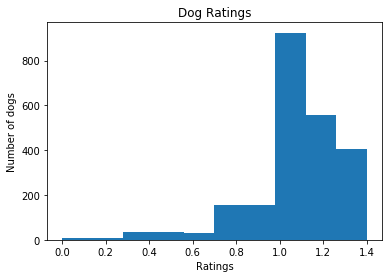

In [52]:
# Ratings hsitogram
plt.title('Dog Ratings');
plt.xlabel('Ratings')
plt.ylabel('Number of dogs')
plt.hist(df_clean['rating'])

The above histogram graph shows that the rating is skewed to the right, which mean that most dogs are rated above 1

In [53]:
df_clean.groupby('dog_types')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_types,,,,,,,,
None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doggo,97.0,1.180412,0.155884,0.5,1.1,1.2,1.3,1.4
floofer,9.0,1.188889,0.105409,1.0,1.1,1.2,1.3,1.3
pupper,243.0,1.078189,0.173377,0.3,1.0,1.1,1.2,1.4
puppo,29.0,1.210345,0.117549,0.9,1.2,1.2,1.3,1.4


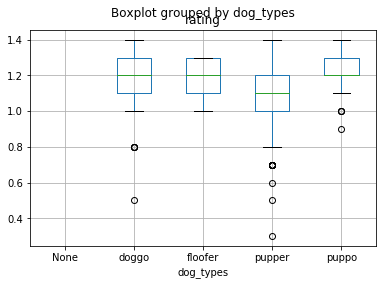

In [54]:
# Ratings hsitogram based on types
df_clean.boxplot(column='rating', by = 'dog_types');

The median is 1.2 for all of the dog_types except for pupper, it's around 1.1. So, most people rate thier dogs above 1

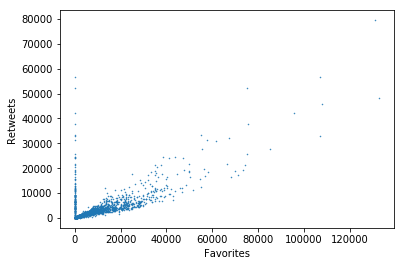

In [55]:
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.plot(df_clean.favorite_count, df_clean.retweet_count,linestyle='',marker='o', markersize=0.5)

As shown above, people who favorite mostly retweet.